## Strategy v0.2.1
#### @20-07-2023

## Level-01

#### Pre-req - 
    1.  a.) Use DF rows at or after first 40 mins
        b.) loop for all >40 every minute for stocks

#### Process Steps:
    2. Aroon > 80 && have touched 100 in last 10 mins
        2.a. If Yes - eligible for trade && move to the next step
    3. MACD > 0 && MACD > macd-signal
    4. ADX 
        ADX above 20 and DI+ above DI-: That's an uptrend.
        ADX above 20 and DI- above DI+: That's a downtrend.
        ADX below 20 is a weak trend or ranging period
    5. RSI > 70 && moving downward - Sell signal
        Else if RSI < 30 && moving upward after getting below 30  -> Buy signal
    6. STO < 20 and trending upward -> Buy
          Else if STO > 80 and trending downward -> short sell
    7. OBV following trend - confirmation to go along
          else if diverging - trend reversal expected
    8. A/D - if going up - Buy
        8.a elseif going down - sell
        elseif diverging - trend reversal   
        
# Level-02
    1. Get signal based on TA values
    2. Review back-testing results
    3. Fine-tune - iterative process
    4. Finalize.
  


In [55]:
# imports
import pandas as pd
import pandas_datareader.data as pdr
import talib as ta
import yfinance as yf
import csv

from talib.abstract import *
from talib import MA_Type
from datetime import datetime

import matplotlib.pyplot as plt 
plt.style.use('bmh')


In [56]:
# Get today's date in yyyy-mm-dd format
today_date = datetime.today().strftime('%Y%m%d')
# today_date = '20230728'

tickerStrings = ['GRASIM.NS']         # , 'MSFT'], GRASIM.NS, SBIN.NS
tickerfile = '';
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", period="1d", interval="1m")
    data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    data.to_csv(f'ticker_{ticker}_{today_date}.csv')  # ticker_AAPL_yyyymmss.csv for example
    tickerfile = 'ticker'+ '_' + ticker + '_' + today_date + ".csv"
#     print('ticker'+ '_' + ticker + '_' + today_date + ".csv")
    print(tickerfile)
    
aapl = pd.read_csv(tickerfile)
aapl

[*********************100%***********************]  1 of 1 completed
ticker_GRASIM.NS_20230801.csv


,Datetime,Open,High,Low,Close,Adj Close,Volume,ticker
0,2023-08-01 09:15:00+05:30,1851.949951,1853.250000,1848.000000,1848.500000,1848.500000,0,GRASIM.NS
1,2023-08-01 09:16:00+05:30,1846.750000,1846.750000,1841.550049,1841.550049,1841.550049,3711,GRASIM.NS
2,2023-08-01 09:17:00+05:30,1840.349976,1842.849976,1840.300049,1841.949951,1841.949951,1120,GRASIM.NS
3,2023-08-01 09:18:00+05:30,1841.150024,1842.300049,1838.300049,1842.199951,1842.199951,2720,GRASIM.NS
4,2023-08-01 09:19:00+05:30,1841.400024,1843.500000,1841.150024,1843.000000,1843.000000,3016,GRASIM.NS
...,...,...,...,...,...,...,...,...
370,2023-08-01 15:25:00+05:30,1837.300049,1837.300049,1836.800049,1836.849976,1836.849976,3934,GRASIM.NS
371,2023-08-01 15:26:00+05:30,1836.949951,1837.949951,1836.849976,1837.949951,1837.949951,2448,GRASIM.NS
372,2023-08-01 15:27:00+05:30,1838.000000,1838.000000,1835.250000,1836.349976,1836.349976,2625,GRASIM.NS
373,2023-08-01 15:28:00+05:30,1835.650024,1836.349976,1835.000000,1835.849976,1835.849976,1552,GRASIM.NS


In [57]:
# use CSV from system
# aapl = pd.read_csv('SBIN.csv')
# aapl = pd.read_csv('ticker_SBIN.NS_20230731.csv')
# aapl = pd.read_csv(tickerfile)
len(aapl)

375

In [58]:
# len(aapl)
# print(aapl.duplicated())

In [59]:
# Making hr_mins as index
aapl['hr_mins'] = aapl['Datetime'][11:13] + aapl['Datetime'][14:16]

for i in range(len(aapl)):
    aapl['hr_mins'][i] = aapl['Datetime'][i][11:13] + aapl['Datetime'][i][14:16]
    
aapl.set_index('hr_mins', inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_16044\20015611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['hr_mins'][i] = aapl['Datetime'][i][11:13] + aapl['Datetime'][i][14:16]


In [60]:
aapl.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume,ticker
hr_mins,,,,,,,,
1525,2023-08-01 15:25:00+05:30,1837.300049,1837.300049,1836.800049,1836.849976,1836.849976,3934,GRASIM.NS
1526,2023-08-01 15:26:00+05:30,1836.949951,1837.949951,1836.849976,1837.949951,1837.949951,2448,GRASIM.NS
1527,2023-08-01 15:27:00+05:30,1838.000000,1838.000000,1835.250000,1836.349976,1836.349976,2625,GRASIM.NS
1528,2023-08-01 15:28:00+05:30,1835.650024,1836.349976,1835.000000,1835.849976,1835.849976,1552,GRASIM.NS
1529,2023-08-01 15:29:00+05:30,1835.800049,1835.800049,1833.000000,1833.199951,1833.199951,1898,GRASIM.NS


### Step 1 - Pre-requisites
    a.) Use DF rows at or after first 40 mins
    b.) Update DF with required columns

In [61]:
# aapl2 = aapl
# aapl = aapl[0:40]

In [62]:
# Add All indicator columns

# OBV - On Balance Volume
aapl['OBV'] = OBV(aapl['Close'], aapl['Volume'])

# Accumulation and Distribution line - Chaikin A/D Line
aapl['AD'] = AD(aapl['High'], aapl['Low'], aapl['Close'], aapl['Volume'])

# AROON Indicator
aapl['aroondown'], aapl['aroonup'] = AROON(aapl['High'], aapl['Low'], timeperiod=14)

# MACD
aapl['macd'], aapl['macdsignal'], aapl['macdhist'] = MACD(aapl['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# ADX Indicator
aapl['adx']  = ADX(aapl['High'], aapl['Low'], aapl['Close'], timeperiod=14)
aapl['PLUS_DI'] = PLUS_DI(aapl['High'], aapl['Low'], aapl['Close'], timeperiod=14)
aapl['MINUS_DI'] = MINUS_DI(aapl['High'], aapl['Low'], aapl['Close'], timeperiod=14)

# RSI
aapl['RSI'] = ta.RSI(aapl['Close'],14) 

# Stochastic
aapl['slowk'], aapl['slowd'] = ta.STOCH(aapl['High'], aapl['Low'], aapl['Close'], fastk_period=14, slowk_period=3, 
                                        slowk_matype=0, slowd_period=3, slowd_matype=0)




## Combined Run 02:
    @20-Jul-2023

In [63]:
# Approach: 02 - Make all the three indicator groups independent

# Trend Indicator
aroon = 0
arup = 0
macd = 0
macdval = 0
macdsignal = 0
adx = 0
plusdi = 0
minusdi = 0

# Momentum
rsi = 0
stoch = 0

# Volume
adv = 0
obv = 0

# index range
start = 0
end = len(aapl)

# result csv
csv_header = ['Datetime', 'OBV', 'A/D', 'Aroon', 'MACD', 'ADX', 'RSI', 'RSI01', 'RSI02', 'Stoch']
ticker_signal_csv = ticker + '_' + 'signal' + '_' + today_date + '.csv'

with open(ticker_signal_csv, 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(csv_header)
# result csv ends              

for i in range (start, end):
    
# Checking for Volume indicators
    # OBV
    price_trend = 0  # used by OBV as well as A/D
    obv_trend = 0
    adv_trend = 0
    
    
    if((aapl.iloc[i-10]['Close']) != 0):    
        price_trend = (aapl.iloc[i]['Close'] - aapl.iloc[i-10]['Close'])/(aapl.iloc[i-10]['Close'])
    
    if((aapl.iloc[i-10]['OBV']) != 0):
        obv_trend = (aapl.iloc[i]['OBV'] - aapl.iloc[i-10]['OBV'])/(aapl.iloc[i-10]['OBV'])

    if((aapl.iloc[i]['OBV'] > aapl.iloc[i-5]['OBV']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        obv = 1
    elif((aapl.iloc[i]['OBV'] > aapl.iloc[i-5]['OBV']) and (aapl.iloc[i]['Close'] < aapl.iloc[i-5]['Close'])):
        obv = 36
    elif((aapl.iloc[i]['OBV'] < aapl.iloc[i-5]['OBV']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        obv = 36
    elif((price_trend > 1.4*obv_trend) or (1.4*price_trend < obv_trend)):
        obv = 36
    else:
        obv = 0
    
    # A/D
    # -----
    if((aapl.iloc[i-10]['AD']) != 0):
        ad_trend = (aapl.iloc[i]['AD'] - aapl.iloc[i-10]['AD'])/(aapl.iloc[i-10]['AD'])

    if((aapl.iloc[i]['AD'] > aapl.iloc[i-5]['AD']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        adv = 1
    elif((aapl.iloc[i]['AD'] > aapl.iloc[i-5]['AD']) and (aapl.iloc[i]['Close'] < aapl.iloc[i-5]['Close'])):
        adv = 36
    elif((aapl.iloc[i]['AD'] < aapl.iloc[i-5]['AD']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        adv = 36
    elif((price_trend > 1.4*ad_trend) or (1.4*price_trend < ad_trend)):
        adv = 36
    else:
        adv = 0
    
#  Checking for momentum indicators
    # Aroon Setup
    ar100 = 'N'
    arup = aapl.iloc[i]['aroonup']
    aroon = 0

    for n in range(i-10,i):
        if(aapl.iloc[n]['aroonup'] == 100):
            ar100 = 'Y'
    if((arup > 80) and (ar100 == "Y") ):
        aroon = 1 
    
    # MACD
    macd = 0
    macdval = aapl.iloc[i]['macd']
    macdsignal = aapl.iloc[i]['macdsignal']

    if((macdval >0) and (macdval > macdsignal)):
        macd = 1
        
    # ADX
    adx = 0

    adxval = aapl.iloc[i]['adx']
    plusdi = aapl.iloc[i]['PLUS_DI']
    minusdi = aapl.iloc[i]['MINUS_DI']

    if((adxval >= 20) and (plusdi > minusdi)):
        adx = 1
    elif((adxval >= 20) and (plusdi < minusdi)):
        adx = -1
    else:
        adx = 0
    
    ####  Checking for momentum indicators
    # RSI
    if((aapl.iloc[i]['RSI'] > 70) and (aapl.iloc[i]['RSI'] < aapl.iloc[i-1]['RSI'])):
        rsi = -1
    elif((aapl.iloc[i]['RSI'] < 30) and (aapl.iloc[i]['RSI'] > aapl.iloc[i-1]['RSI'])):
        rsi = 1
    else:
        rsi = 0

    # STO - slowk, slowd
    if((aapl.iloc[i]['slowk'] > 80) and (aapl.iloc[i]['slowk'] < aapl.iloc[i]['slowd'])):
        stoch = -1
    elif((aapl.iloc[i]['slowk'] < 30) and (aapl.iloc[i]['slowk'] > aapl.iloc[i]['slowd'])):
        stoch = 1
    else:
        stoch = 0
        
    
    
    
        
# Final status
    if((obv ==1) and (adv==1) and (aroon==1) and (macd >0) and (adx >0) ):
        
        print(aapl.iloc[i]['Datetime'], " OBV:", obv, " A/D:", adv
          ," Aroon:", aroon, " MACD:", macd, " ADX:", adx
          ," RSI:", rsi, " ", aapl.iloc[i]['RSI'], " ", aapl.iloc[i-1]['RSI'] 
          , " Stoch:", stoch)
        data = [aapl.iloc[i]['Datetime'], obv, adv, aroon, macd, adx, rsi, aapl.iloc[i]['RSI'], aapl.iloc[i-1]['RSI'], stoch]
        
        # write results to file
        with open(ticker_signal_csv, 'a', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(data)
        
#         print(aapl.iloc[i])
#         print(aapl.loc[aapl['Datetime'] == aapl.iloc[i]['Datetime']])
        

2023-08-01 11:24:00+05:30  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   73.42569052419486   51.724521363915166  Stoch: 0
2023-08-01 11:25:00+05:30  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   49.63512468325978   73.42569052419486  Stoch: 0
2023-08-01 13:22:00+05:30  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   52.97187403492746   52.44208486650281  Stoch: 0
2023-08-01 13:23:00+05:30  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   61.3162677795305   52.97187403492746  Stoch: 0
2023-08-01 13:24:00+05:30  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   61.72304600717845   61.3162677795305  Stoch: 0
2023-08-01 13:25:00+05:30  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   69.89642666755887   61.72304600717845  Stoch: 0
2023-08-01 13:26:00+05:30  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   77.29405718985274   69.89642666755887  Stoch: 0
2023-08-01 13:27:00+05:30  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   84.01314791037215   77.2940571898

In [64]:
# check summary status:

# aapl.tail()
# aapl.loc[aapl['Datetime'] == '2023-07-14 12:21:00+05:30']
df = pd.read_csv(ticker_signal_csv)

print(df.to_string()) 

                     Datetime  OBV  A/D  Aroon  MACD  ADX  RSI      RSI01      RSI02  Stoch
0   2023-08-01 11:24:00+05:30    1    1      1     1    1    0  73.425691  51.724521      0
1   2023-08-01 11:25:00+05:30    1    1      1     1    1    0  49.635125  73.425691      0
2   2023-08-01 13:22:00+05:30    1    1      1     1    1    0  52.971874  52.442085      0
3   2023-08-01 13:23:00+05:30    1    1      1     1    1    0  61.316268  52.971874      0
4   2023-08-01 13:24:00+05:30    1    1      1     1    1    0  61.723046  61.316268      0
5   2023-08-01 13:25:00+05:30    1    1      1     1    1    0  69.896427  61.723046      0
6   2023-08-01 13:26:00+05:30    1    1      1     1    1    0  77.294057  69.896427      0
7   2023-08-01 13:27:00+05:30    1    1      1     1    1    0  84.013148  77.294057     -1
8   2023-08-01 13:28:00+05:30    1    1      1     1    1    0  86.280297  84.013148     -1
9   2023-08-01 13:29:00+05:30    1    1      1     1    1    0  67.792411  86.28

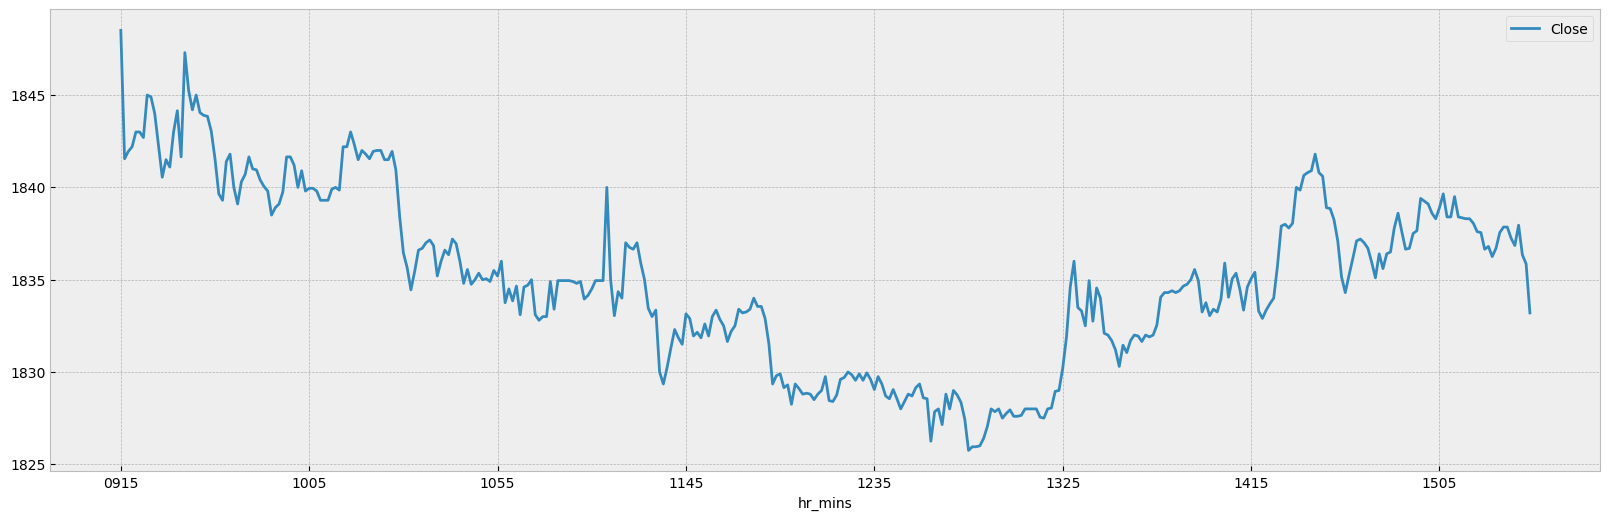

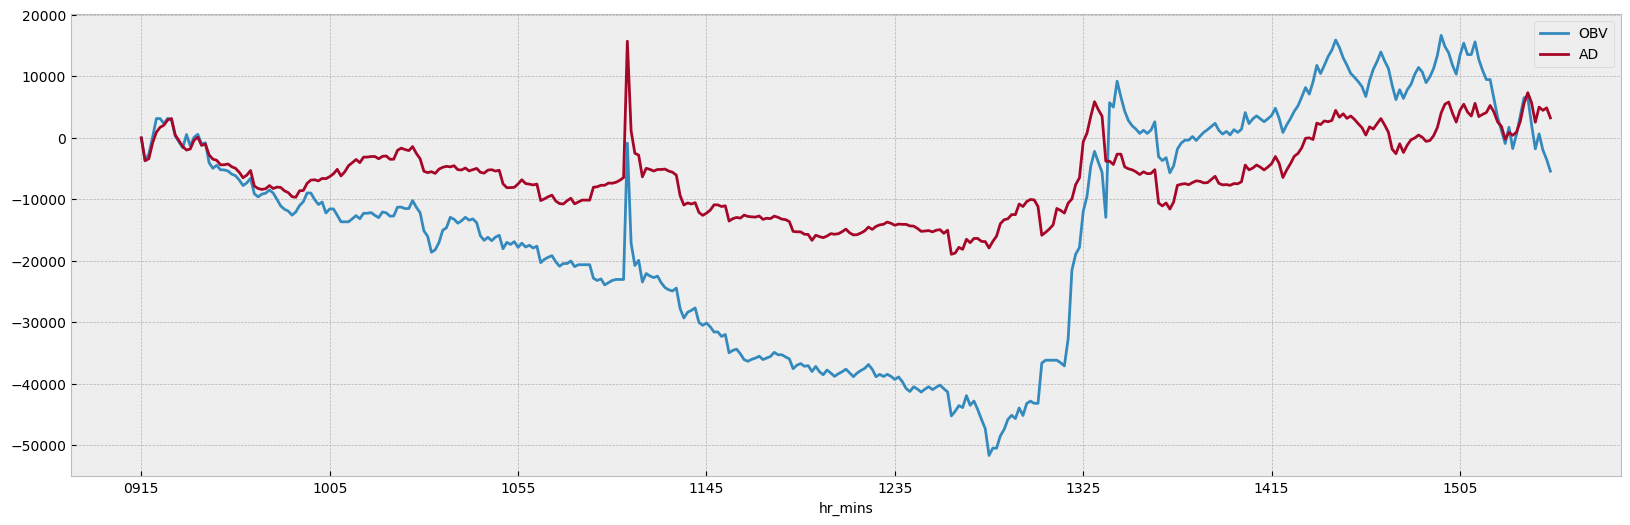

In [65]:
aapl[['Close']].plot(figsize=(20,6))
aapl[['OBV', 'AD']].plot(figsize=(20,6))
# aapl[['AD']].plot(figsize=(20,6)) 

plt.show()

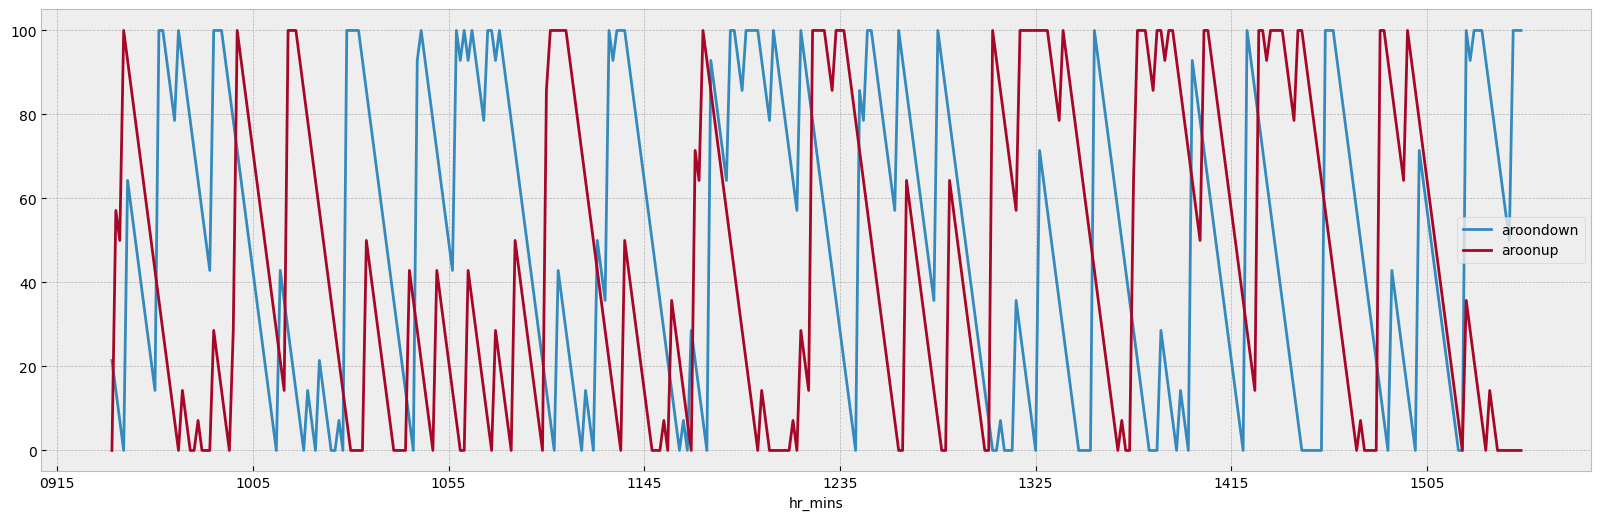

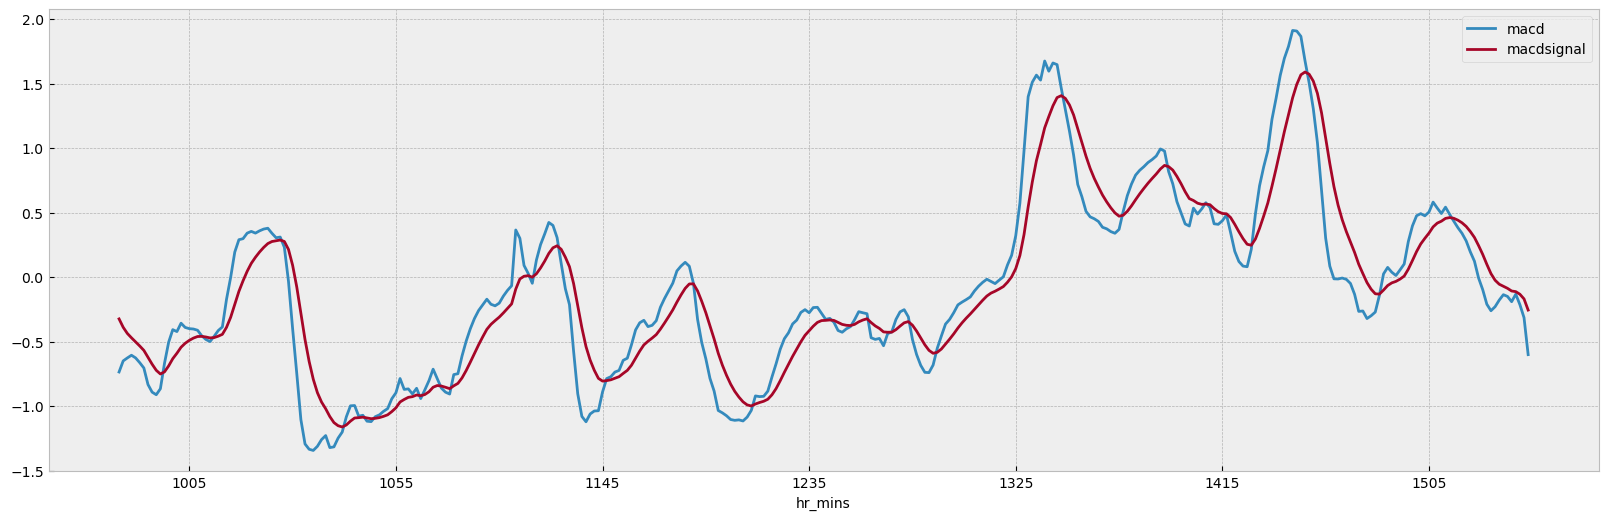

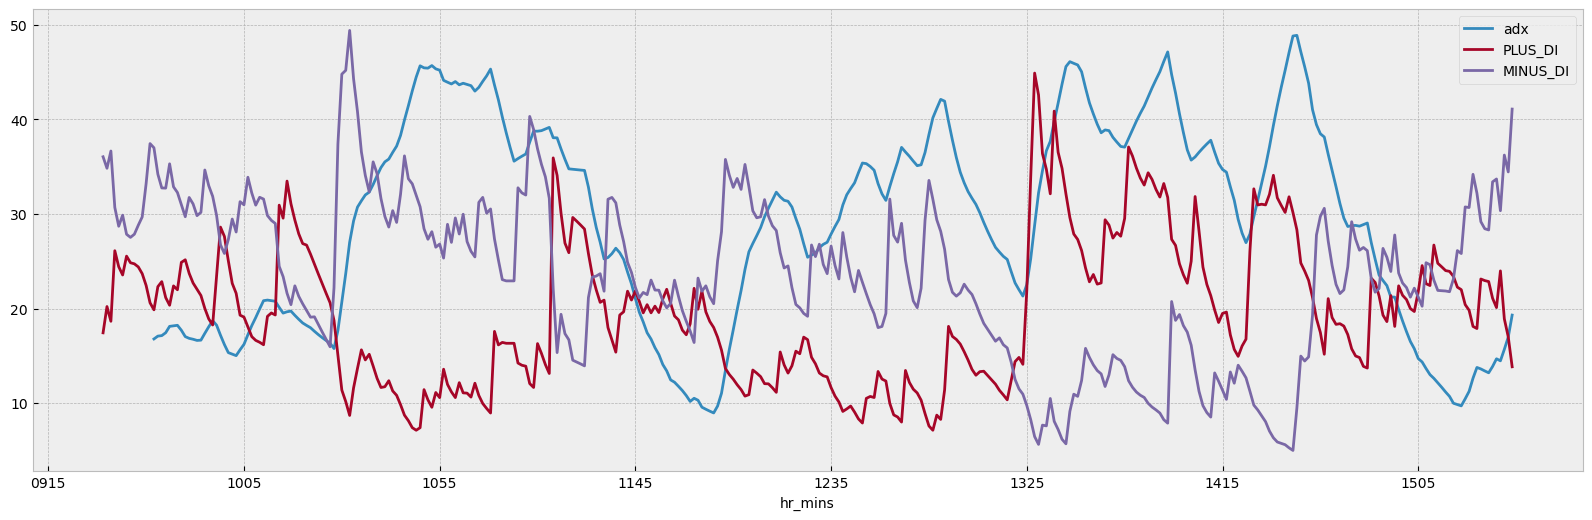

In [66]:
aapl[['aroondown','aroonup']].plot(figsize=(20,6))
aapl[['macd', 'macdsignal']].plot(figsize=(20,6)) 
aapl[['adx', 'PLUS_DI', 'MINUS_DI' ]].plot(figsize=(20,6)) 
# aapl['RSI'].plot(figsize=(12,6)) 
# aapl[['slowk','slowd']].plot(figsize=(12,6))
# aapl[['OBV']].plot(figsize=(16,6))
# aapl[['AD']].plot(figsize=(16,6)) 
 
plt.show()

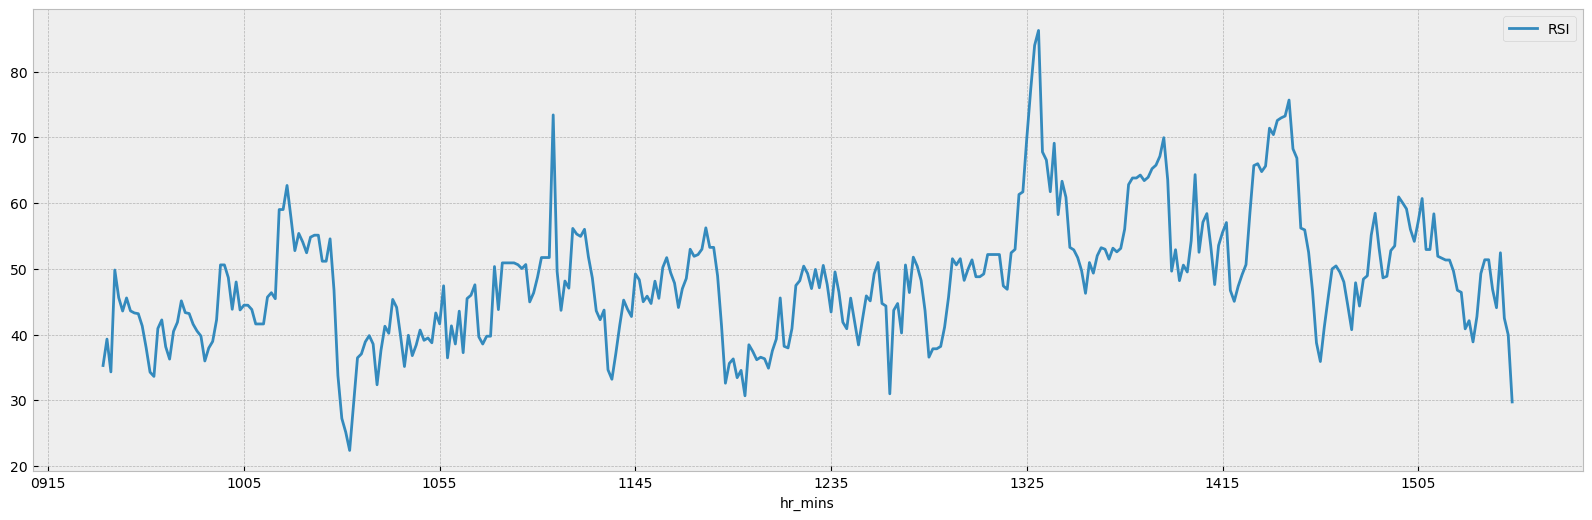

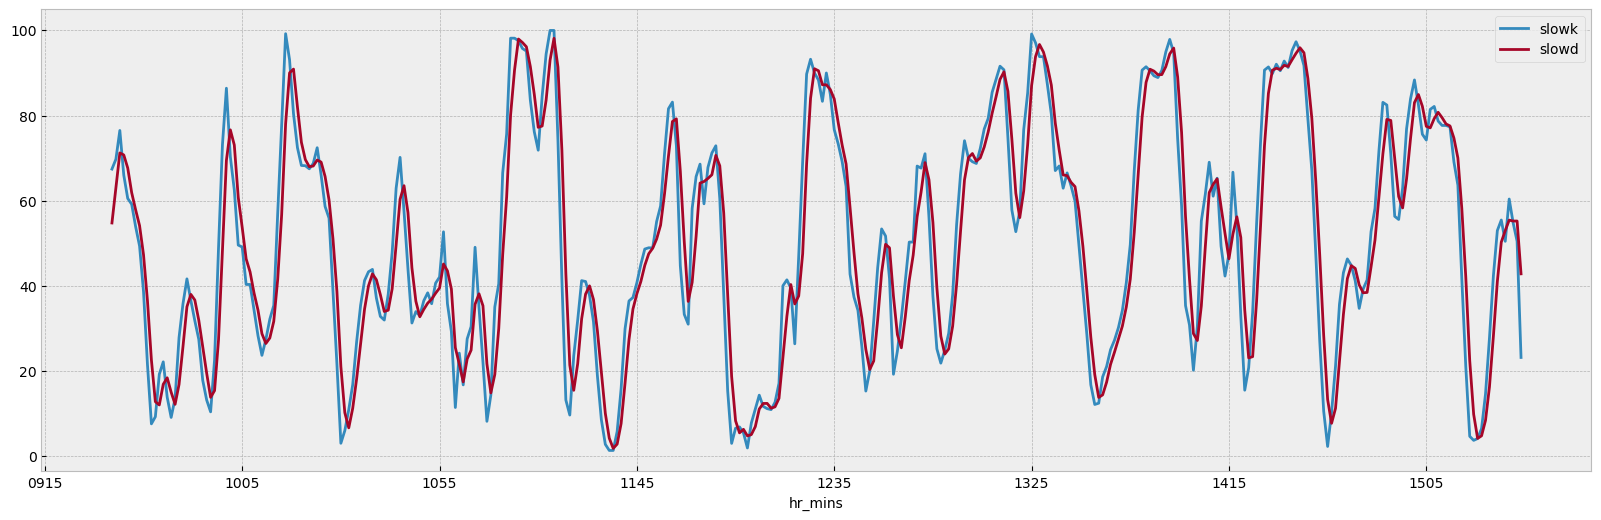

In [67]:
aapl[['RSI']].plot(figsize=(20,6)) 
aapl[['slowk','slowd']].plot(figsize=(20,6))   #STO - slowk, slowd
# aapl[['Close']].plot(figsize=(20,6))
plt.show()

In [68]:
# Row details based on Column values 
# df.loc[df['column_name'] == some_value]
# aapl.loc[aapl['Datetime'] == '2023-07-14 11:34:00+05:30']

# aapl.iloc[i]
# Index based
# aapl.iloc[[139]]

In [69]:
# aapl

In [70]:
# print(aapl['ticker'][0])

# print(ticker + '_' + 'signal' + '_' + today_date + ".csv")

# Next Step
    1. Alerts for each required instances
    2. Go with flow